In [1]:
import torch
import random
import torchvision
from glob import glob
from src.models import Generator
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from src.dataset import TrainDataset, ValidationDataset

In [2]:
images = glob('./VOC2012/JPEGImages/*')
random.shuffle(images)
len(images)

17125

In [3]:
train_images = images[:16000]
val_images = images[16000:17000]
test_images = images[17000:]

print('Train Images:', len(train_images))
print('Validation Images:', len(val_images))
print('Test Images:', len(test_images))

Train Images: 16000
Validation Images: 1000
Test Images: 125


## Testing Datasets

In [4]:
train_dataset = TrainDataset(train_images, crop_size=88, scale=2)
val_dataset = ValidationDataset(val_images, scale=2)

print('Length of Train Dataset:', len(train_dataset))
print('Length of Validation Dataset:', len(val_dataset))

Length of Train Dataset: 16000
Length of Validation Dataset: 1000


In [5]:
train_lr, train_hr = train_dataset[0]
train_lr.shape, train_hr.shape

(torch.Size([3, 44, 44]), torch.Size([3, 88, 88]))

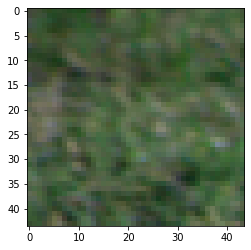

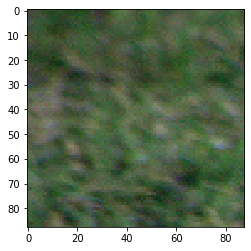

In [6]:
plt.imshow(torchvision.transforms.ToPILImage()(train_lr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(train_hr))
plt.show()

In [7]:
val_lr, val_hr, val_hr_restore = val_dataset[0]
val_lr.shape, val_hr.shape, val_hr_restore.shape

(torch.Size([3, 120, 120]),
 torch.Size([3, 240, 240]),
 torch.Size([3, 240, 240]))

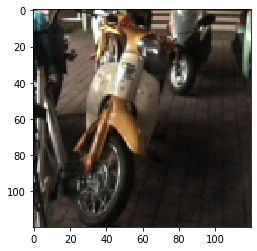

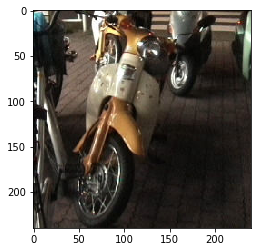

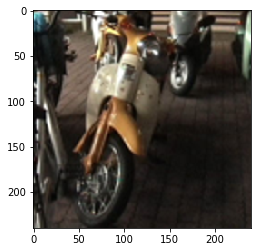

In [8]:
plt.imshow(torchvision.transforms.ToPILImage()(val_lr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(val_hr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(val_hr_restore))
plt.show()

## Testing Dataloaders

In [9]:
train_loader = train_dataset.get_loader(num_workers=1, batch_size=1)
val_loader = val_dataset.get_loader(num_workers=1, batch_size=1)

In [10]:
train_lr, train_hr = next(iter(train_loader))
train_lr.shape, train_hr.shape

(torch.Size([1, 3, 44, 44]), torch.Size([1, 3, 88, 88]))

In [11]:
val_lr, val_hr, val_hr_restore = next(iter(val_loader))
val_lr.shape, val_hr.shape, val_hr_restore.shape

(torch.Size([1, 3, 166, 166]),
 torch.Size([1, 3, 332, 332]),
 torch.Size([1, 3, 332, 332]))

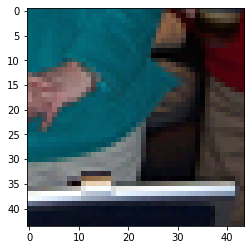

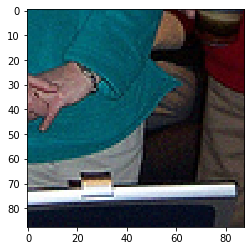

In [12]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_hr)))
plt.show()

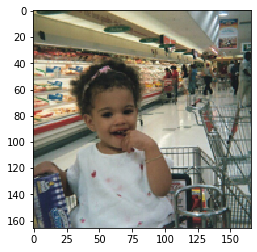

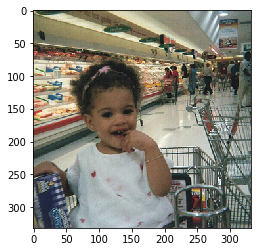

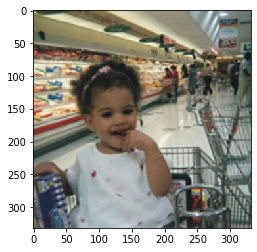

In [13]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr_restore)))
plt.show()

## Testing Models

In [14]:
generator = Generator(scale=2)
print(generator)

Generator(
  (block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (block_2): Sequential(
    (0): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): PReLU(num_parameters=1)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): PReLU(num_parameters=1)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, mom

In [15]:
train_sr = generator(train_lr)
train_sr.shape

torch.Size([1, 3, 88, 88])

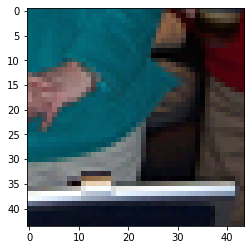

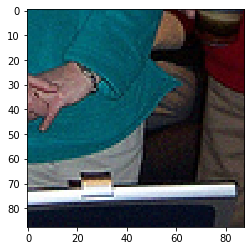

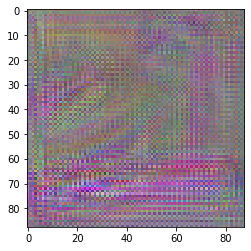

In [16]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_sr)))
plt.show()

In [17]:
val_sr = generator(val_lr)
val_sr.shape

torch.Size([1, 3, 332, 332])

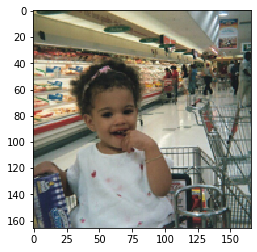

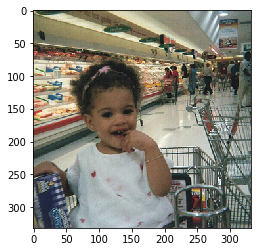

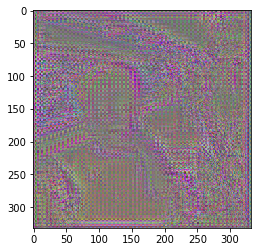

In [18]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_sr)))
plt.show()